<a href="https://colab.research.google.com/github/cinthia005/Artificial-Intelligence/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AF4_Supervised Learning Model: Decision_Tree**
**Team Members:**
 - Cinthia Janeth Pecina Hernández    (2062979)
 - Andrea Lizeth Barrera Soto         (2132052)
 - Aime Alejandra Padilla Padilla     (2064375)
 - Ana Paola de león Zapata           (2050345)
 - Fernanda Monsterrat Luque Hernánez (2002572)

**Career:** Biomedical Engineering

**Group:** 002

**Class:** Artificial Inteligence

**Professor:** Daniel Isaías López Páez

**Hour:** MWF N2

**Objective:** This project implements a Decision Tree classifier to predict breast cancer diagnosis, being malignant(0) vs. benign (1), using the Wisconsin Diagnostic Dataset from from Scikit-learn.

**1. Load Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

**2. Load Data**

In [4]:
print("\n" + "="*50)
print("BREAST CANCER DATASET")
print("="*50)

# Load dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target

# Create DataFrame for better data exploration
df = pd.DataFrame(X, columns=breast_cancer.feature_names)
df['target'] = Y
df['diagnosis'] = df['target'].apply(lambda x: 'malignant' if x == 0 else 'benign')

print(" Dataset loaded successfully!")
print(f" Dataset shape: {df.shape}")
print(f" Features: {X.shape[1]}")
print(f" Samples: {X.shape[0]}")
print(f" Target names: {breast_cancer.target_names}")

# Display target distribution
print("\n TARGET DISTRIBUTION:")
target_counts = df['target'].value_counts()
print(f"   Benign (1): {target_counts[1]} samples")
print(f"   Malignant (0): {target_counts[0]} samples")

print("\n First 3 rows of the dataset:")
print(df.head(3))


BREAST CANCER DATASET
 Dataset loaded successfully!
 Dataset shape: (569, 32)
 Features: 30
 Samples: 569
 Target names: ['malignant' 'benign']

 TARGET DISTRIBUTION:
   Benign (1): 357 samples
   Malignant (0): 212 samples

 First 3 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \
0                 0.07871  ...            184.6      2019

**3. Data preprocessing**

In [5]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42
)

print(f"\nTraining set: {X_train.shape[0]} samples (80%)")
print(f"Testing set: {X_test.shape[0]} samples (20%)")


Training set: 455 samples (80%)
Testing set: 114 samples (20%)


**4. Model selection and training**

In [6]:
# Create and train Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

# Training accuracy
train_accuracy = clf.score(X_train, Y_train)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Tree depth: {clf.get_depth()}")
print(f"Number of leaves: {clf.get_n_leaves()}")


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

print("\nDecision Tree model trained successfully")

Training Accuracy: 1.0000 (100.00%)
Tree depth: 7
Number of leaves: 16

Decision Tree model trained successfully


**5. Model testing**

In [7]:
Y_predict = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_predict)
print(f"\nAccuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_predict, target_names=breast_cancer.target_names))


Accuracy: 0.9474

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



**6. Results**

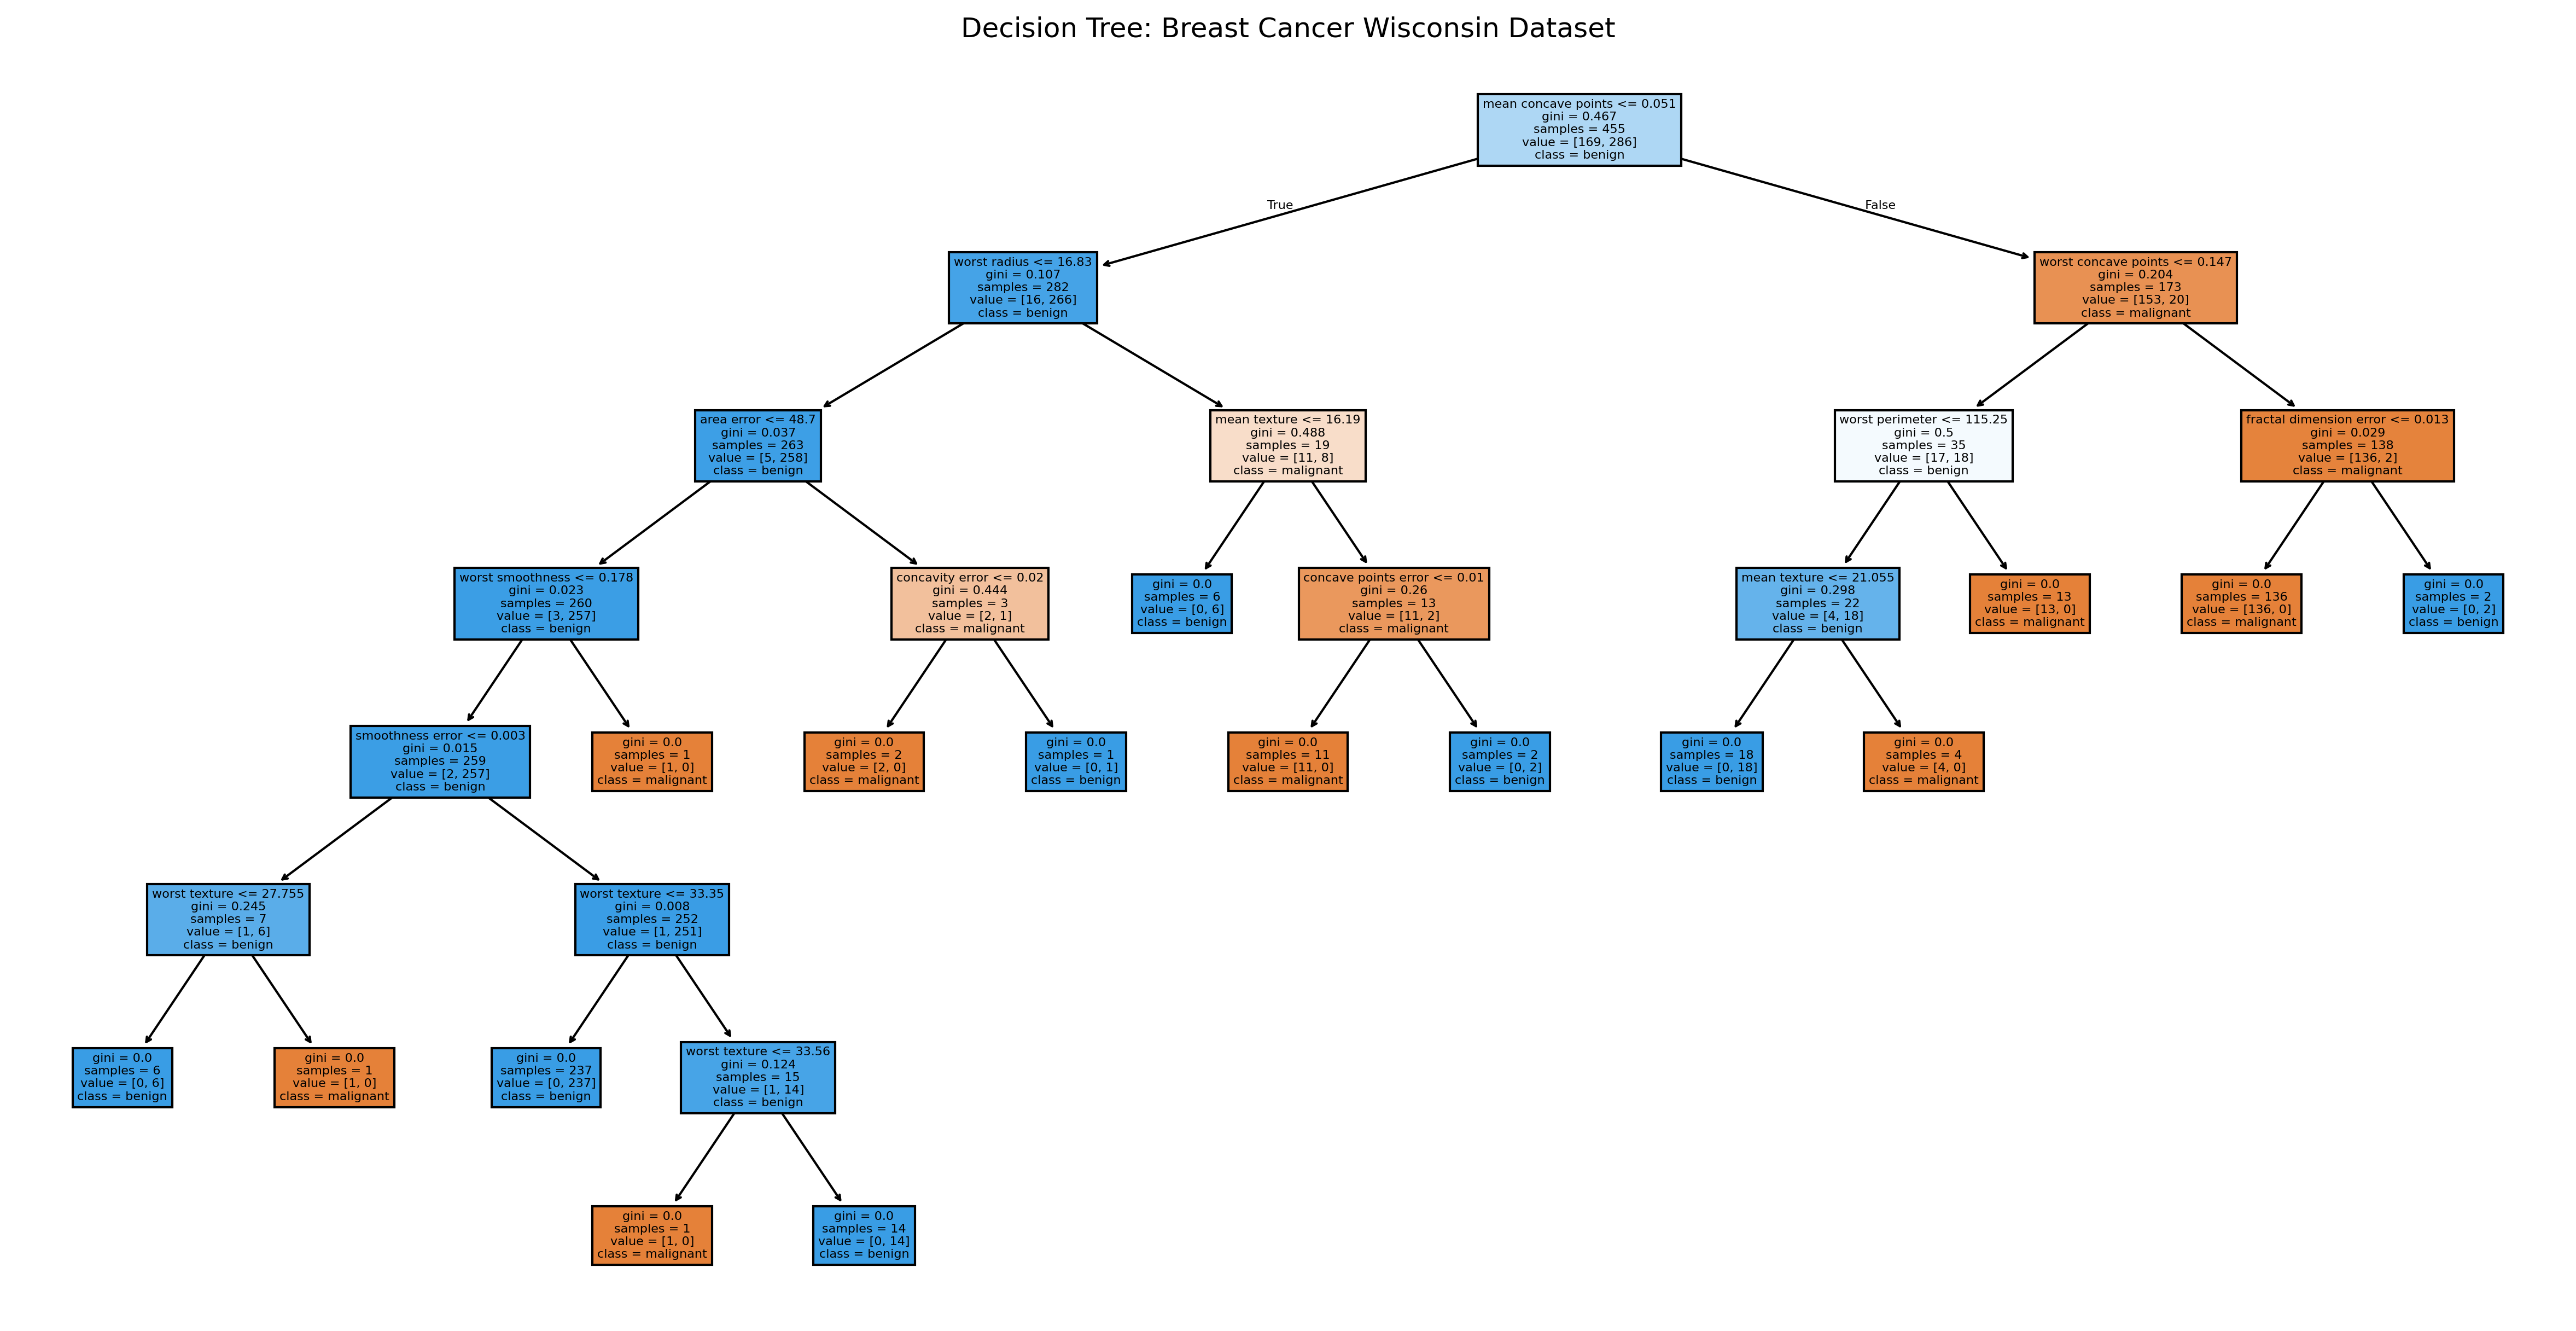

In [8]:
plt.figure(figsize=(20, 10), dpi=300)
tree.plot_tree(clf,
               filled=True,
               feature_names=breast_cancer.feature_names,
               class_names=breast_cancer.target_names)
plt.title("Decision Tree: Breast Cancer Wisconsin Dataset")
plt.show()